In [ ]:
pip install tweepy

 **Scrapping with the Twitter API and importing all libraries** 




The first task is to access into the Twitter API application to have the functionalities offer by Twitter. In this way, one can acceed to the account of twitter developer.


In [1]:
import tweepy
consumer_key = "IWNhdBvUHrlTQDS3wbqyI3nSJ"
consumer_secret = "mCwNwRe39wqNiwDyu7xCBorMirLY7ouWIKl1K8uJ9EGijXTAiV"
access_token = "1572913917864677376-6hP8DJQ5aYdNhRGKfkBGJruUTCvj53"
access_token_secret = "jqAC9Uw86o8wS9SW8LxH00IQRa9ebgj8lBfGtf1Vuocum"
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [ ]:
user = api.get_user(screen_name="twitter")
twitter = [user.name, user.screen_name, user.location, user.description, user.followers_count]

In [ ]:
user = api.get_user(screen_name="iaeaorg")
iaea_org = [user.name, user.screen_name, user.location, user.description, user.followers_count]
user = api.get_user(screen_name="NRCgov")
NRCgov = [user.name, user.screen_name, user.location, user.description, user.followers_count]
user = api.get_user(screen_name="WECNuclear")
WECNuclear = [user.name, user.screen_name, user.location, user.description, user.followers_count]
user = api.get_user(screen_name="CTBTO")
CTBTO = [user.name, user.screen_name, user.location, user.description, user.followers_count]
user = api.get_user(screen_name="WorldNuclear")
WorldNuclear = [user.name, user.screen_name, user.location, user.description, user.followers_count]
user = api.get_user(screen_name="W_Nuclear_News")
W_Nuclear_News = [user.name, user.screen_name, user.location, user.description, user.followers_count]
user = api.get_user(screen_name="ANS_org")
ANS_org = [user.name, user.screen_name, user.location, user.description, user.followers_count]
user = api.get_user(screen_name="GovNuclear")
GovNuclear = [user.name, user.screen_name, user.location, user.description, user.followers_count]
user = api.get_user(screen_name="OECD_NEA")
OECD_NEA = [user.name, user.screen_name, user.location, user.description, user.followers_count]
user = api.get_user(screen_name="NEI")
NEI = [user.name, user.screen_name, user.location, user.description, user.followers_count]

In [ ]:
usernames_dict = {'iaea_org':iaea_org,'NRCgov':NRCgov,'WECNuclear':WECNuclear,'CTBTO':CTBTO,'WorldNuclear':WorldNuclear,'W_Nuclear_News':W_Nuclear_News,'ANS_org':ANS_org,'GovNuclear':GovNuclear,'OECD_NEA':OECD_NEA,'NEI':NEI}

 The dictionary **usernames_dict** stores the case studies of this research, it meanse: 10 official twitter accounts of ten different stakeholders, organizations, companies, etc. that are focused in nuclear energy and nuclear related topics. The dictionary collects their different name, screen name, location, description and number of followers. 

In [ ]:
usernames_dataframes = pd.DataFrame.from_dict(usernames_dict) 
usernames_dataframes.to_csv (r'/content/drive/MyDrive/1stProject/usernames.csv', index=False, header=True)

--------------------------------------------------------------------------------

After the previous code I will be extracting tweets from the full archive research endpoint. 

**Importing the libraries**

In [2]:
# For sending GET requests from the API
import requests
# For saving access tokens and for file management when creating and adding to the dataset
import os
# For dealing with json responses we receive from the API
import json
# For displaying the data after
import pandas as pd
# For saving the response data in CSV format
import csv
# For parsing the dates received from twitter in readable formats
import datetime
import dateutil.parser
import unicodedata
#To add wait time between requests
import time

**Setting the bearer token and authentication**

In [3]:
os.environ['TOKEN'] = 'AAAAAAAAAAAAAAAAAAAAABwflgEAAAAAMZ0LMiWnsOODzs425YrTXBNnPEo%3DiVo7aG2bcUIxuK3UNoJzafPg3x903U2QhW5epZ5L8r9iah4r9A'
def auth():
    return os.getenv('TOKEN')

In [4]:
def create_headers(bearer_token):
    headers = {"Authorization": "Bearer {}".format(bearer_token)}
    return headers

At this point, we have done a function that return headers to enter in the API.

**Building the request**

In [5]:
def create_url(keyword, start_date, end_date , max_results):
    
    search_url = "https://api.twitter.com/2/tweets/search/all" #Change to the endpoint you want to collect data from
    #the link to find the endpoints: 
    #change params based on the endpoint you are using
    query_params = {'query': keyword, #retweets_of_tweet_id:1539382664746020864 when replies to be obtained, 'from:iaeaorg lang:en' when extract from a username
                    #in this case we will be requesting up to 500 tweets from iaeaorg
                    'start_time': start_date,
                    'end_time': end_date,
                    'max_results': max_results,
                    'expansions': 'author_id,in_reply_to_user_id,geo.place_id',
                    'tweet.fields': 'id,text,author_id,in_reply_to_user_id,geo,conversation_id,created_at,lang,public_metrics,referenced_tweets,reply_settings,source',
                    'user.fields': 'id,name,username,created_at,description,public_metrics,verified',
                    'place.fields': 'full_name,id,country,country_code,geo,name,place_type',
                    'next_token': {}} #the next_token will be generated bby the twitter developer platform, enter it once you want to retrieve more. 
    return (search_url, query_params)

**Connect to the Endpoint**

The idea will be to put URL, headers and parameters together to connect to the endpoint of searchall. 

In [6]:
def connect_to_endpoint(url, headers, params, next_token = None):
    params['next_token'] = next_token   #params object received from create_url function
    response = requests.request("GET", url, headers = headers, params = params)
    print("Endpoint Response Code: " + str(response.status_code))
    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    return response.json()

**Creating the first request**

The following code will contain the parameters that we are asking for during the request. The request will return a format type that is JSON, it means JavaScript Object Notation JSON Format. 

In [ ]:
bearer_token = auth() #All the parameters are inside of this cell.
headers = create_headers(bearer_token)
keyword = " lang:en in_reply_to_tweet_id:1499695549875896320" #"from:iaeaorg lang:en note that other features can be always retrieved
start_time = "2021-01-01T00:00:00.000Z"
end_time = "2023-01-01T00:00:00.000Z"
max_results = 500

In [ ]:
url = create_url(keyword, start_time,end_time, max_results) #Here, we are asking for the request given the previous parameters
json_response = connect_to_endpoint(url[0], headers, url[1]) 
json_response_list=[]
json_response_list.append(json_response) #The list contains the different dictionaries from the twitter extraction.

Endpoint Response Code: 200


At this point, one dictionary (json file) is extracted per month. Therefore, a list called *json_response_list* that stores the 24 ditionaries (12 months for the year 2021 and 2022). 

In [ ]:
from collections import defaultdict
d_response = defaultdict(list)
for d in (json_response_list): # you can list as many input dicts as you want here. In our case, all the 24 dictionaries of the list
  for key, value in d.items():
      d_NEI[key].append(value)

Now, we will store all the data collected from the time periods desired coming from all the different user accounts using the writing function of open in a single json file. 

**Writing the entire data in a json file**

In [ ]:
with open('/content/drive/MyDrive/1stProject/AcademicTweets/tweets_NEI.json', 'w') as f:
    json.dump(iaea_org, f)

Once we have done the request, we can read the data as its contained in a **json file**. In this way, we can start to make it readable using another format like .csv for our desired purposes.

--------------------------------------------------------------------------------
**Arranging the json dictionaries to obtain .csv files.**

Initially, lets open all the json files already created. Later, lets create a .csv per each .json file that contains some headers. Later, lets iterate over al the .json file to write the .csv file that contain a table of all the information needed.  

In [ ]:
def openjson_createcsv (json_file):
  """
  This function reads the json files and create csv to store the data of the tweets collected. 
  Parameters
  -------------------------------------------------------
  json_file: this is the name of the file we want to analyse without any extension

  Output
  -------------------------------------------------------
  json_dictionary: this is the name of the dictionary to extract the info. 
  """
  with open('/content/drive/MyDrive/1stProject/AcademicTweets/'+str(json_file)+'.json', 'r') as f: #here we will read the file we desire, the json files created. 
    json_dictionary = json.load(f)
  # Create file
  csvFile = open('/content/drive/MyDrive/1stProject/AcademicTweets/'+str(json_file)+'.csv', "a", newline="", encoding='utf-8')
  csvWriter = csv.writer(csvFile)
  csvWriter.writerow(['created_at', 'id', 'geo','like_count', 'impression_count', 'reply_count','retweet_count','author_id','tweet']) #here we creat the headers desired 
  csvFile.close()
  return json_dictionary

In [ ]:
def append_to_csv(json_dictionary,csv_file):
  """
  This function appends all the data desired from the dictionary .json in a .csv file.
  Parameters
  ------------------------------------------------------------------------------------
  json_dictionary: this dictionary has all the tweets already retrieved
  csv_file: the name of the csv created. 
  """
  csvFile = open('/content/drive/MyDrive/1stProject/AcademicTweets/'+str(csv_file)+'.csv', "a", newline="", encoding='utf-8') #open the csv file
  csvWriter = csv.writer(csvFile)
  for i in range(len(json_dictionary['data'])): #iterate over the groups of data
    for tweet in range(len(json_dictionary['data'][i])): #iterate inside each tweet of a particular i group of data
      counter = 0 #counter to finish when all have been done 
      created_at = dateutil.parser.parse(json_dictionary['data'][i][tweet]['created_at']) #data we like to extract
      id = json_dictionary['data'][i][tweet]['conversation_id']
      if 'geo' in json_dictionary['data'][i][tweet]:
        geo = json_dictionary['data'][i][tweet]['geo']['place_id']
      else: 
        geo = ''
      like_count = json_dictionary['data'][i][tweet]['public_metrics']['like_count']
      impression_count = json_dictionary['data'][i][tweet]['public_metrics']['impression_count']
      reply_count = json_dictionary['data'][i][tweet]['public_metrics']['reply_count']
      retweet_count = json_dictionary['data'][i][tweet]['public_metrics']['retweet_count']
      author_id =  json_dictionary['data'][i][tweet]['author_id']
      text = json_dictionary['data'][i][tweet]['text']
      res = [created_at, id, geo, like_count, impression_count, reply_count, retweet_count, author_id, text ] #list with the data desired 
      csvWriter.writerow(res) #overwriting in the csv file
      counter += 1
  csvFile.close()
  return

In [ ]:
append_to_csv(openjson_createcsv('tweets_ANS_org'),'tweets_ANS_org') #This line of code creates the .csv from the name of the json file without .json extension

**Extracting the replies of the different tweets in the two years (2021-2023)**

So, initially, I will see how to loop over all the different IDs of the tweets to perform the requests. This will be done for the iaea_org dataset. Consider that the replies will be obtained for the entries in the dataset that content replies. Otherwise, there's nothing to extract. 

In [67]:
iaea_org = pd.read_csv('/content/drive/MyDrive/1stProject/AcademicTweets/tweets_iaeaorg.csv')
NEI = pd.read_csv('/content/drive/MyDrive/1stProject/AcademicTweets/tweets_NEI.csv')
ANS = pd.read_csv('/content/drive/MyDrive/1stProject/AcademicTweets/tweets_ANS_org.csv')
CTBTO = pd.read_csv('/content/drive/MyDrive/1stProject/AcademicTweets/tweets_CTBTO.csv')
GovNuclear = pd.read_csv('/content/drive/MyDrive/1stProject/AcademicTweets/tweets_GovNuclear.csv')
NRCgov = pd.read_csv('/content/drive/MyDrive/1stProject/AcademicTweets/tweets_NRCgov.csv')
WECNuclear = pd.read_csv('/content/drive/MyDrive/1stProject/AcademicTweets/tweets_WECNuclear.csv')
WorldNuclear = pd.read_csv('/content/drive/MyDrive/1stProject/AcademicTweets/tweets_WorldNuclear.csv')
OECDNEA = pd.read_csv('/content/drive/MyDrive/1stProject/AcademicTweets/tweets_OECD_NEA.csv')
WorldNuclearNews = pd.read_csv('/content/drive/MyDrive/1stProject/AcademicTweets/tweets_W_Nuclear_News.csv')


In [ ]:
bearer_token = auth() #All the parameters are inside of this cell.
headers = create_headers(bearer_token)
start_time = "2021-01-01T00:00:00.000Z"
end_time = "2023-01-01T00:00:00.000Z"
max_results = 500
import time
i = 0
for id in WorldNuclearNews[WorldNuclearNews['reply_count']!=0]['id'].to_list()[0:]: #This was done by considering all the tweets that had reply count different of zero. 
  keyword = 'lang:en in_reply_to_tweet_id:'+str(id)
  url = create_url(keyword, start_time,end_time, max_results) #Here, we are asking for the request given the previous parameters
  json_response = connect_to_endpoint(url[0], headers, url[1]) 
  json_response_list.append(json_response)
  print(i)
  i = i+1
  time.sleep(2) #The list contains the different dictionaries from the twitter extraction.

In [66]:
from collections import defaultdict
d_WorldNuclearNews = defaultdict(list)
for d in (json_response_list): # you can list as many input dicts as you want here. In our case, all the 24 dictionaries of the list
  for key, value in d.items():
      d_WorldNuclearNews[key].append(value)
with open('/content/drive/MyDrive/1stProject/Replies/replies_worldnuclearnews.json', 'w') as f:
    json.dump(d_WorldNuclearNews, f)

Now, lets make the json files into csv files. In that way, we could do the cleaning of the datafiles. Therefore, lets **create the datasets that will store the replies.** They include different columns this time as they contain the data: reply_to_id (id of the twitter they come from), replied_to_user_id (user_id where the twitter come from). 

In [114]:
with open('/content/drive/MyDrive/1stProject/Replies/replies_worldnuclearnews.json', 'r') as f: #here we will read the file we desire, the json files created. 
  json_dictionary = json.load(f)

In [98]:
def openjsonreplies_createcsv (json_file): #These files come from the 
  """
  This function reads the json files and create csv to store the data of the tweets collected. 
  Parameters
  -------------------------------------------------------
  json_file: this is the name of the file we want to analyse without any extension

  Output
  -------------------------------------------------------
  json_dictionary: this is the name of the dictionary to extract the info. 
  """
  with open('/content/drive/MyDrive/1stProject/Replies/'+str(json_file)+'.json', 'r') as f: #here we will read the file we desire, the json files created. 
    json_dictionary = json.load(f)
  # Create file
  csvFile = open('/content/drive/MyDrive/1stProject/Replies/'+str(json_file)+'.csv', "a", newline="", encoding='utf-8')
  csvWriter = csv.writer(csvFile)
  csvWriter.writerow(['created_at', 'id','like_count','author_id','reply_to_id','replied_to_user_id','tweet']) #here we creat the headers desired 
  csvFile.close()
  return json_dictionary

In [99]:
def appendreplies_to_csv(json_dictionary,csv_file):
  """
  This function appends all the data desired from the dictionary .json in a .csv file.
  Parameters
  ------------------------------------------------------------------------------------
  json_dictionary: this dictionary has all the tweets already retrieved
  csv_file: the name of the csv created. 
  """
  csvFile = open('/content/drive/MyDrive/1stProject/Replies/'+str(csv_file)+'.csv', "a", newline="", encoding='utf-8') #open the csv file
  csvWriter = csv.writer(csvFile)
  for i in range(len(json_dictionary['data'])): #iterate over the groups of data
    for tweet in range(len(json_dictionary['data'][i])): #iterate inside each tweet of a particular i group of data
      counter = 0 #counter to finish when all have been done 
      created_at = dateutil.parser.parse(json_dictionary['data'][i][tweet]['created_at']) #data we like to extract
      id = json_dictionary['data'][i][tweet]['id']
      like_count = json_dictionary['data'][i][tweet]['public_metrics']['like_count']
      author_id =  json_dictionary['data'][i][tweet]['author_id']
      reply_to_id = json_dictionary['data'][i][tweet]['referenced_tweets'][0]['id']
      replied_to_user_id = json_dictionary['data'][i][tweet]['in_reply_to_user_id']
      text = json_dictionary['data'][i][tweet]['text']
      res = [created_at, id, like_count, author_id, reply_to_id, replied_to_user_id, text ] #list with the data desired 
      csvWriter.writerow(res) #overwriting in the csv file
      counter += 1
  csvFile.close()
  return

In [110]:
appendreplies_to_csv(openjsonreplies_createcsv('replies_worldnuclearnews'),'replies_worldnuclearnews')

At this point, all the .csv files have been created and will be subjected to a data cleaning for exploratory data analysis. In this purpose, I find reasonable to perform the EDA for one .csv file and later to do it for the other nine. 

________________________________________________________________________________
**Data Cleaning**

In [111]:
def cleaning_officialtweets(dataframe):
  """
  This function cleans the dataframe and organizes for further analysis
  input: dataframes to clean
  output:cleaned dataframes
  """
  dataframe['Date'] =  pd.to_datetime(dataframe['Created at'], infer_datetime_format=True)
  dataframe['Day'] = dataframe['Date'].dt.day
  dataframe['Month'] = dataframe['Date'].dt.month
  dataframe['Year'] = dataframe['Date'].dt.year
  dataframe['ID'] = dataframe['ID'].astype(int)
  dataframe = dataframe.drop_duplicates()
  dataframe = dataframe.drop(columns=['Unnamed: 0','Created at'])
  dataframe = dataframe[['ID', 'Date','Day', 'Month', 'Year', 'User Name','Location','Text','Language','Retweet counts','Favorites counts','Hashtags']]
  return dataframe

In [ ]:
iaea_org = pd.read_csv('/content/drive/MyDrive/1stProject/AcademicTweets/tweets_iaeaorg.csv')

In [ ]:
iaea_org.info()

In [ ]:
import re
iaea_org['clean_text'] = pd.Series(dtype=str)

for row in range(0, len(iaea_org)):
    #Create the right regex expression here
    stripped = re.sub(r'[\b@][A-Za-z0-9_]+', "", iaea_org['tweet'][row])
    stripped= re.sub(r'[^\w\s]','',stripped)
    stripped= re.sub(r'\bRT ','',stripped)
    stripped= re.sub(r'\bhttp','',stripped)
    stripped= re.sub(r'\bhttps','',stripped)
    stripped= re.sub(r'\bamp','',stripped)
    stripped= re.sub(r'\bstco','',stripped)
    stripped = re.sub('[0-9]+[a-z]*', ' ', stripped)
    iaea_org['clean_text'][row] = stripped

<ipython-input-9-29139b968774>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iaea_org['clean_text'][row] = stripped


In [ ]:
import matplotlib.pyplot as plt #For graph plotting
from wordcloud import STOPWORDS #To define stopWords
#Define the stop words 
stopwords = set(STOPWORDS)
#Create the function that removes the words
def clean_text(input_txt):
    words = input_txt.lower().split()

    #Creates a list of words exclusing those which are defined as stopwords
    noise_free_words = [word for word in words if word not in stopwords]

    #Turns the list back into a text
    noise_free_text = " ".join(noise_free_words)

    #Returns the text
    return noise_free_text

#Implement the function using "lambda"
iaea_org["clean_text"] = iaea_org["clean_text"].apply(lambda s: str(s))
iaea_org["clean_text"] = iaea_org["clean_text"].apply(lambda s: clean_text(s))

In [ ]:
from nltk import PorterStemmer, LancasterStemmer
porter = PorterStemmer()
lancaster=LancasterStemmer()

iaea_org['text_stemmed_porter'] = pd.Series(dtype= str)
iaea_org['text_stemmed_lancaster'] = pd.Series(dtype=str)

for row in range(0, len(iaea_org)):
    iaea_org['text_stemmed_porter'][row] = porter.stem(iaea_org['clean_text'][row])
    iaea_org['text_stemmed_lancaster'][row] = lancaster.stem(iaea_org['clean_text'][row])

<ipython-input-12-c9cba5736a5a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iaea_org['text_stemmed_porter'][row] = porter.stem(iaea_org['clean_text'][row])
<ipython-input-12-c9cba5736a5a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iaea_org['text_stemmed_lancaster'][row] = lancaster.stem(iaea_org['clean_text'][row])


In [ ]:
iaea_org.loc[0]['text_stemmed_porter']

'teenager interested science cares climatechange voice thoughts tackle climate crisis nuclear digital tech top videos will shown conference deadline january buz mol whjgxlc'

In [ ]:
#Import package
from sklearn.feature_extraction.text import CountVectorizer

#Create the count Vectorizer and Implement it on specific dataset
vect = CountVectorizer()
try:
  vects = vect.fit_transform(iaea_org.text_stemmed_porter)
except:
  pass
#vects.todense() gives a numpy matrix, and here we turn it into a Data Frame
td = pd.DataFrame(vects.todense())

#Getting the names of the words - for a clearer matrix
td.columns = vect.get_feature_names()

#For easier readability
term_document_matrix = td.T

#To get the total count of each word
term_document_matrix['total_count'] = term_document_matrix.sum(axis=1)

In [ ]:
term_document_matrix[term_document_matrix['total_count'] > 100].sort

,0,1,2,3,4,5,6,7,8,9,...,5097,5098,5099,5100,5101,5102,5103,5104,5105,total_count
advanced,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,151
american,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,166
ans,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,780
anss,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,115
answinter,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
winter,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,125
work,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,115
world,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,131
year,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,119


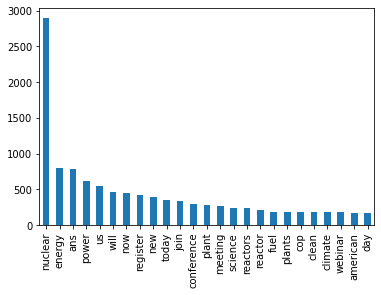

In [ ]:
#Plot the most used 25 words
tdm_top25 = term_document_matrix.sort_values(by ='total_count',ascending=False)[:25]
tdm_top25['total_count'].plot.bar()

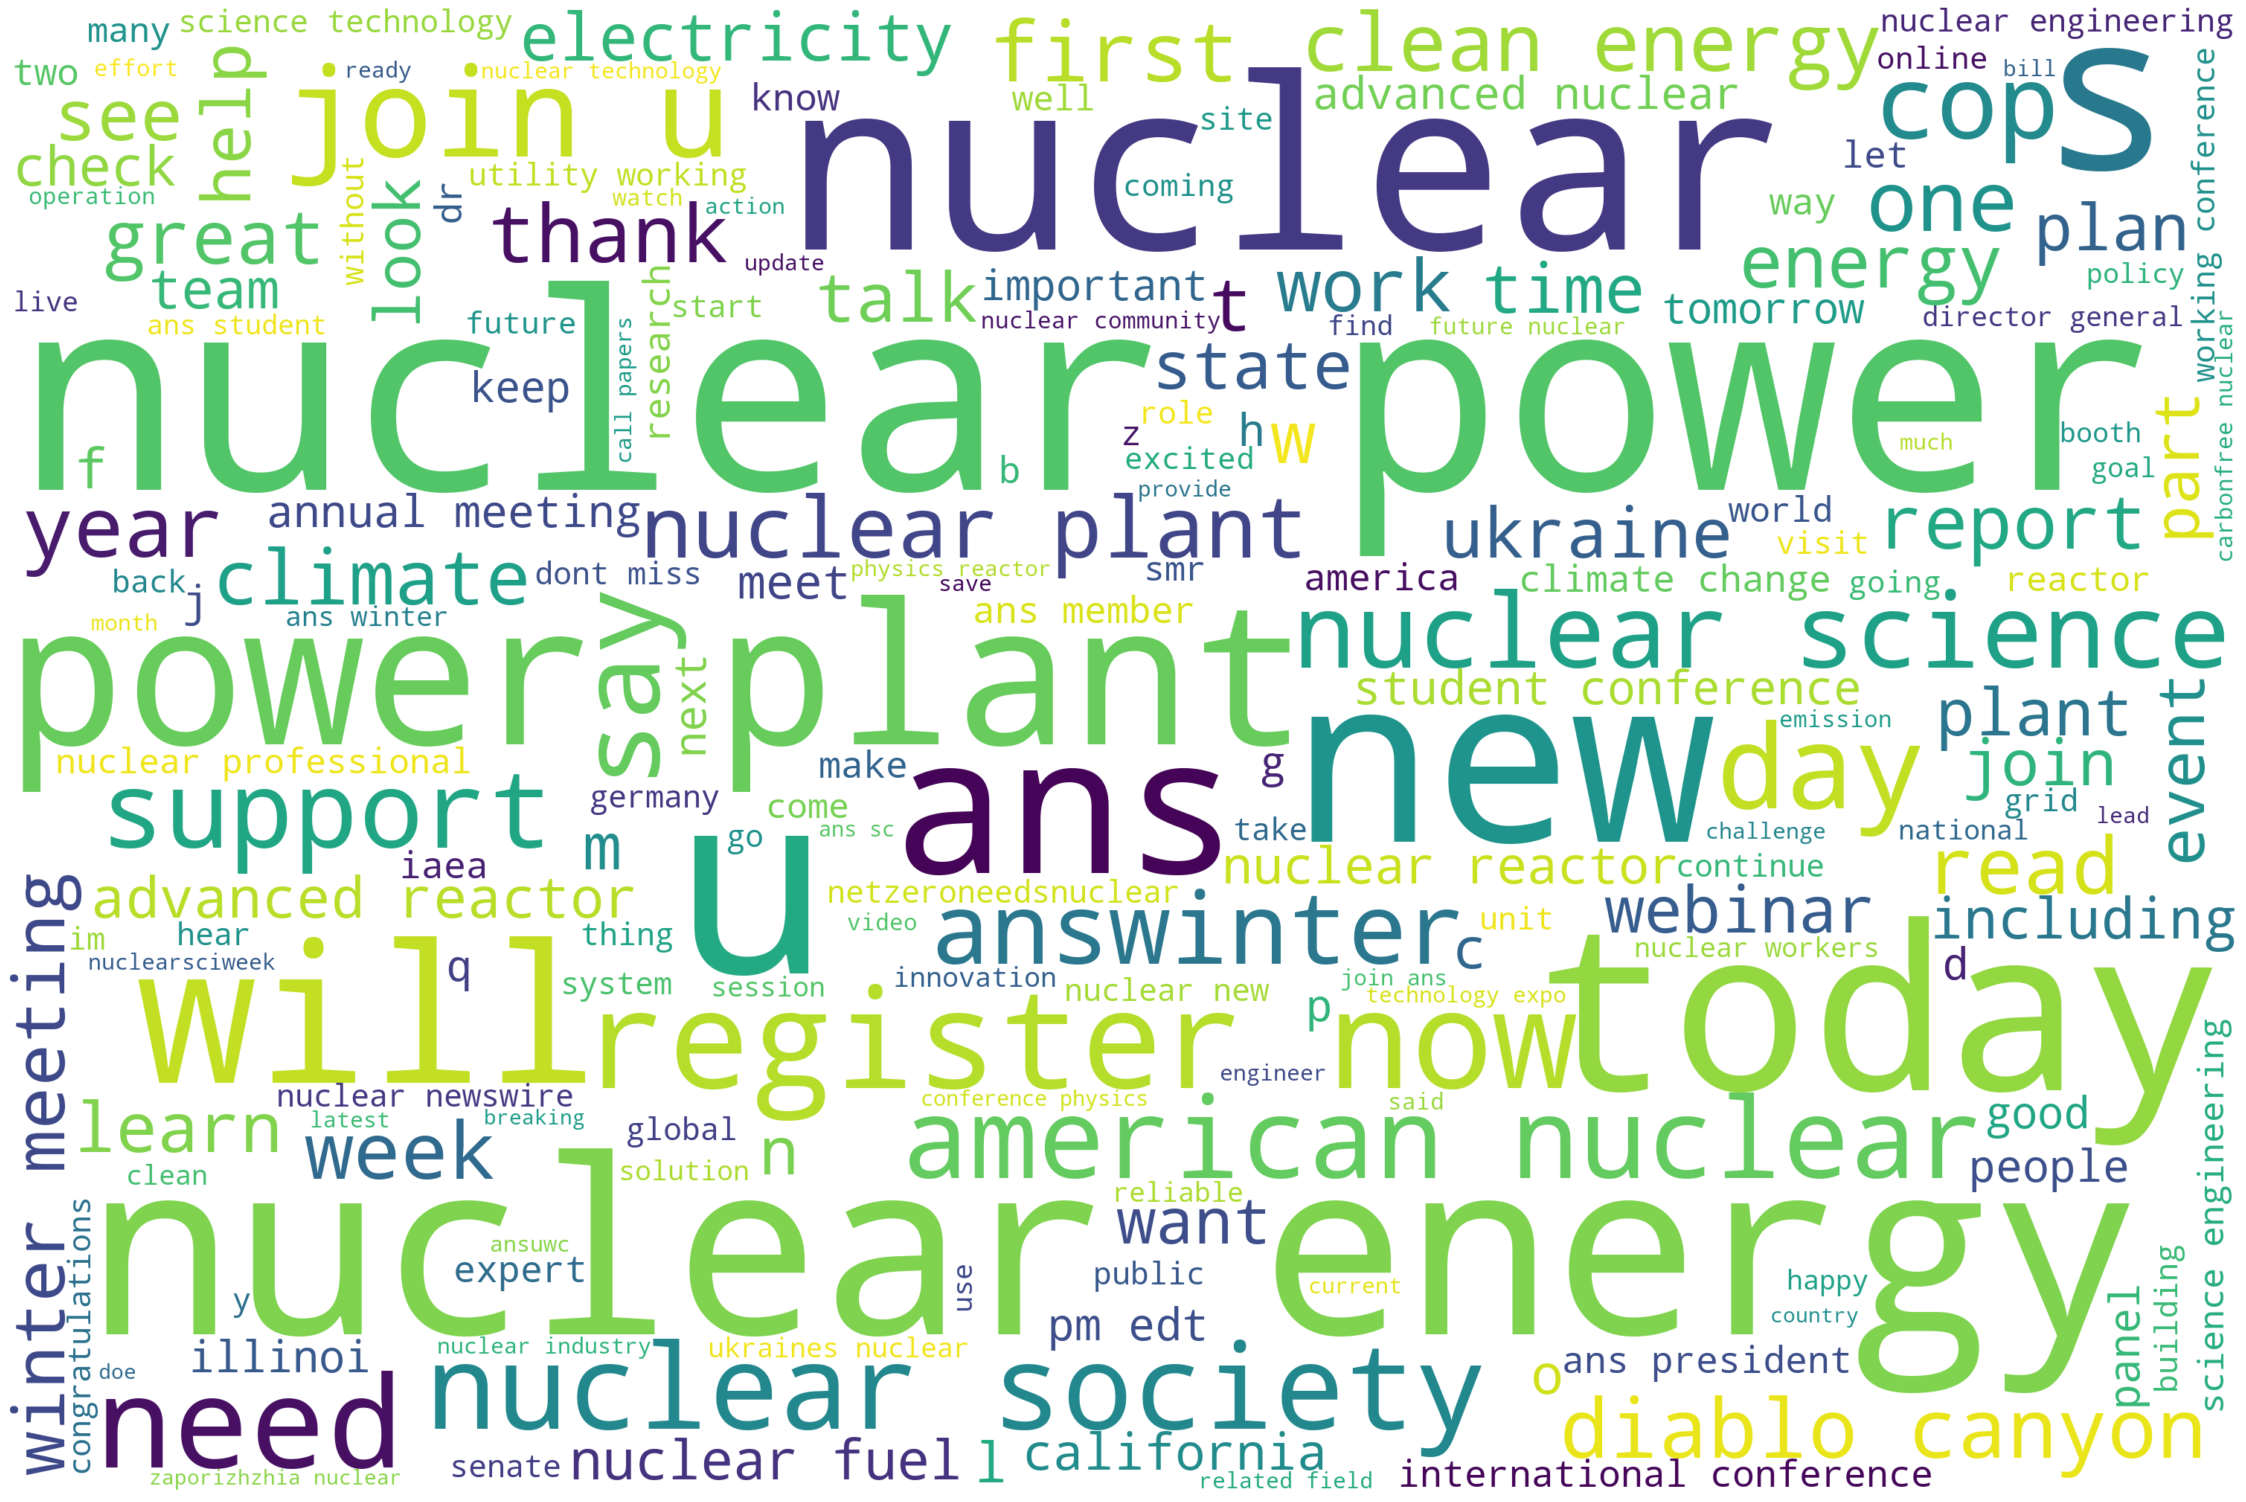

In [ ]:
from wordcloud import WordCloud

def gen_worldcloud(text, stemming):
    #Create the full list of tweets
    full_tweets = " ".join(tweet for tweet in text[stemming])

    #Changing the width, height, background color and stopwords
    wordcloud = WordCloud(width = 3000, height = 2000,background_color='white')
    #Generate based on our list of tweets
    wordcloud.generate(full_tweets)

    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

gen_worldcloud(ANS_org, "text_stemmed_porter")
#gen_worldcloud(ANS_org, "text_stemmed_lancaster")

In [ ]:
pip install nrclex

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nrclex import NRCLex

#The overall sentiment based on all the tweets
full_text = ",".join(ANS_org["text_stemmed_porter"])

nrc_sentiments = NRCLex(full_text).raw_emotion_scores

df_nrc_sentiments = pd.DataFrame.from_dict(nrc_sentiments, orient='index')
df_nrc_sentiments = df_nrc_sentiments.reset_index()
df_nrc_sentiments = df_nrc_sentiments.rename(columns={'index' : 'Emotion Classification' , 0: 'Emotion Count'})
df_nrc_sentiments = df_nrc_sentiments.sort_values(by=['Emotion Count'], ascending=False)

#Graph
import plotly.express as px
fig = px.bar(df_nrc_sentiments, x='Emotion Count', y='Emotion Classification', color = 'Emotion Classification', orientation='h', width = 800, height = 400)
fig.show()

#Calculate sentiment for each tweet
ANS_org["nrc_sentiments"] = ANS_org["text_stemmed_porter"].apply(lambda tweet: NRCLex(tweet).raw_emotion_scores)

In [ ]:
pip install vaderSentiment

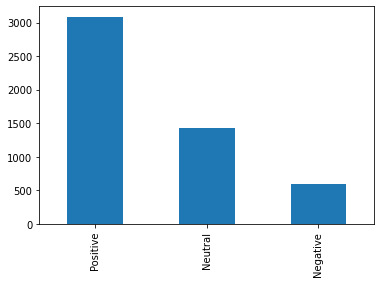

In [ ]:
#import the library
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

#calculate the negative, positive, neutral and compound scores, plus verbal evaluation
def sentiment_vader(sentence):

    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()

    sentiment_dict = sid_obj.polarity_scores(sentence)
    negative = sentiment_dict['neg']
    neutral = sentiment_dict['neu']
    positive = sentiment_dict['pos']
    compound = sentiment_dict['compound']

    if sentiment_dict['compound'] >= 0.05 :
        overall_sentiment = "Positive"

    elif sentiment_dict['compound'] <= - 0.05 :
        overall_sentiment = "Negative"

    else :
        overall_sentiment = "Neutral"

    return negative, neutral, positive, compound, overall_sentiment

#Implement it on each tweet individually
ANS_org["sentiment_vader"] = ANS_org["text_stemmed_porter"].apply(lambda tweet: sentiment_vader(tweet))

df_vader_sentiments = pd.DataFrame()
df_vader_sentiments[["negative_sentiment", "neutral_sentiment", "positive sentiment", "compound_sentiment", "overall_sentiment"]] = \
    pd.DataFrame(ANS_org['sentiment_vader'].tolist())

#Plot the distribution of positive, negative and neutral graphs
df_vader_sentiments["overall_sentiment"].value_counts().plot.bar()

In [ ]:
ANS_org[ANS_org['reply_count']!=0].sort_values(by='reply_count',ascending=False)['tweet'].iloc[-1]

'The U.S. will assist Thailand and the Philippines with #nuclear energy plans!\n\n@VP Kamala Harris announced the launch of a partnership with Thailand to build its #SMR deployment capacity, and with the Philippines to negotiate on civil nuclear cooperation.\n\nhttps://t.co/UTuqWUx8mu https://t.co/S6L9rVYLiI'

In [ ]:
def cleaning_officialtweets(dataframe):
  """
  This function cleans the dataframe and organizes for further analysis
  input: dataframes to clean
  output:cleaned dataframes
  """
  dataframe['Date'] =  pd.to_datetime(dataframe['Created at'], infer_datetime_format=True)
  dataframe['Day'] = dataframe['Date'].dt.day
  dataframe['Month'] = dataframe['Date'].dt.month
  dataframe['Year'] = dataframe['Date'].dt.year
  dataframe['ID'] = dataframe['ID'].astype(int)
  dataframe = dataframe.drop_duplicates()
  dataframe = dataframe.drop(columns=['Unnamed: 0','Created at'])
  dataframe = dataframe[['ID', 'Date','Day', 'Month', 'Year', 'User Name','Location','Text','Language','Retweet counts','Favorites counts','Hashtags']]
  return dataframe